In [4]:
import pandas as pd

from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

In [5]:
def generate_upset_plot(intensities, colname, title, splited=False, is_sorted=False, max_value=500):
    # Extracting unique features from each center
    features_sets = {}
    for center, details in intensities.items():
        # if there is "" or NaN in the column, remove them
        details = details[details[colname].notnull()]
        if is_sorted:
            # split each value in column by ';' and sort the list  and join them back
            features_sets[center] = set(details[colname].apply(lambda x: ';'.join(list(dict.fromkeys(sorted(x.split(';')))))))
        else:
            features_sets[center] = set(details[colname].apply(lambda x: ';'.join(list(dict.fromkeys(x.split(';'))))))
        
    # Preparing data for DataFrame construction
    data = {
        'value': [],
        'Center1': [],
        'Center2': [],
        'Center3': []
    }

    # Combining all unique features from the centers
    all_features = set.union(*features_sets.values())

    # Filling the data dictionary
    for item in all_features:
        data['value'].append(item)
        for center in ['Center1', 'Center2', 'Center3']:
            data[center].append(item in features_sets.get(center, []))
    
    # Creating a DataFrame from the data
    df = pd.DataFrame(data)

    # Generating membership list for UpSet plot
    membership_list = df.drop('value', axis=1).astype(bool).apply(lambda row: row.index[row].tolist(), axis=1)
    example = from_memberships(membership_list, data=df['value'])

    # Creating and displaying the UpSet plot
    upset = UpSet(example, subset_size='count', show_counts=True, sort_by='cardinality')
    upset.plot()
    plt.ylim(0, max_value)
    # add size of plot
    plt.gcf().set_size_inches(4, 4)
    plt.title(title)
    plt.show()

# Read data

In [6]:
centers = {
    'Center1': '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Center1/proteinGroups.txt',
    'Center2': '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Center2/proteinGroups.txt',
    'Center3': '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Center3/proteinGroups.txt'
}
intensities_PG_from_MQ = {}

metadata = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Metadata_CosyBio.tsv', sep='\t')

for center in centers:
    data = pd.read_csv(centers[center], sep='\t')
    ####################### Filtering #######################
    # keep only rows with Reverse != '+'
    # data = data[data['Reverse'] != '+']
    # keep only rows with Potential contaminant != '+'
    # data = data[data['Potential contaminant'] != '+']
    # keep only columns with intensities + Majority protein IDs
    data = data.filter(regex='(Majority protein IDs|Reporter intensity corrected)')

    print(f'Center: {center}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    # data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    # data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_PG_from_MQ[center] = data
    print('')

Center: Center1
Number of features: 567
Number of features after filtering: 567

Center: Center2
Number of features: 583
Number of features after filtering: 583

Center: Center3
Number of features: 505
Number of features after filtering: 505



In [7]:
centers = {
    'Center1': '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Center1/proteinGroups.txt',
    'Center2': '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Center2/proteinGroups.txt',
    'Center3': '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Center3/proteinGroups.txt'
}
intensities_Genes_from_MQ = {}

metadata = pd.read_csv('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Metadata_CosyBio.tsv', sep='\t')

for center in centers:
    data = pd.read_csv(centers[center], sep='\t')
    ####################### Filtering #######################
    # keep only rows with Reverse != '+'
    # data = data[data['Reverse'] != '+']
    # keep only rows with Potential contaminant != '+'
    # data = data[data['Potential contaminant'] != '+']
    # keep only columns with intensities + Majority protein IDs
    data = data.filter(regex='(Gene names|Reporter intensity corrected)')

    print(f'Center: {center}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    # data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    # data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_Genes_from_MQ[center] = data
    print('')

Center: Center1
Number of features: 567
Number of features after filtering: 567

Center: Center2
Number of features: 583
Number of features after filtering: 583

Center: Center3
Number of features: 505
Number of features after filtering: 505



# Is sorting needed?

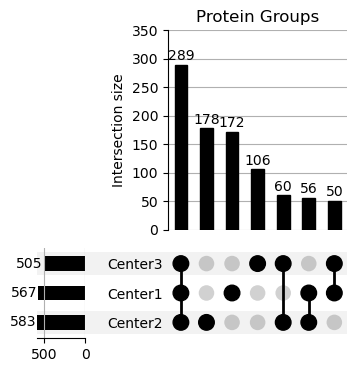

In [9]:
generate_upset_plot(intensities_PG_from_MQ, 'Majority protein IDs', 'Protein Groups', is_sorted=False, max_value=350)

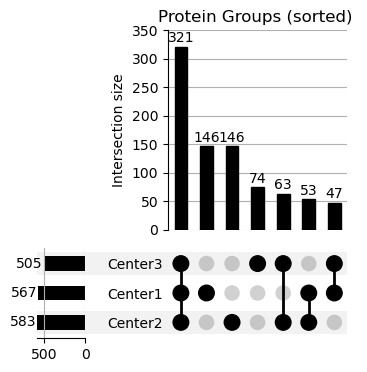

In [10]:
generate_upset_plot(intensities_PG_from_MQ, 'Majority protein IDs', 'Protein Groups (sorted) ', is_sorted=True, max_value=350)

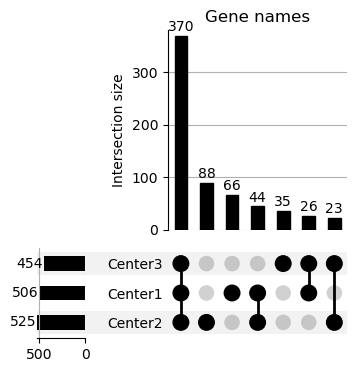

In [11]:
generate_upset_plot(intensities_Genes_from_MQ, 'Gene names', 'Gene names', is_sorted=False, max_value=380)

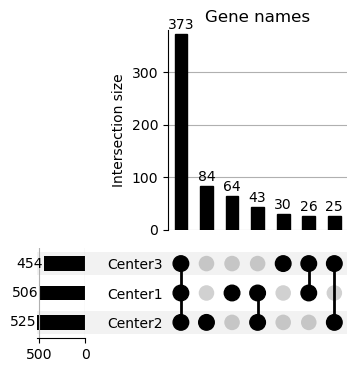

In [12]:
generate_upset_plot(intensities_Genes_from_MQ, 'Gene names', 'Gene names', is_sorted=True, max_value=380)